#**Importing the requires dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve
from yellowbrick.classifier import ConfusionMatrix

#**Data Collection and Analysis**

In [ ]:
ds=pd.read_csv("dataset.csv")
ds=shuffle(ds, random_state=27)
ds.head()#Print five rows after getting shuffled

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4152,Migraine,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2680,Malaria,chills,vomiting,high_fever,sweating,headache,nausea,diarrhoea,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,AIDS,muscle_wasting,patches_in_throat,high_fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,Chronic cholestasis,itching,vomiting,yellowish_skin,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3512,Pneumonia,chills,fatigue,cough,high_fever,breathlessness,sweating,malaise,phlegm,chest_pain,fast_heart_rate,rusty_sputum,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To get the rows and columns
ds.shape

(4920, 18)

Here we have loads of "_" so remove this
replace

In [ ]:
#To replace unwanted character
for cols in ds.columns:
  ds[cols]=ds[cols].str.replace("_"," ")
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4152,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2680,Malaria,chills,vomiting,high fever,sweating,headache,nausea,diarrhoea,muscle pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,AIDS,muscle wasting,patches in throat,high fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,Chronic cholestasis,itching,vomiting,yellowish skin,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3512,Pneumonia,chills,fatigue,cough,high fever,breathlessness,sweating,malaise,phlegm,chest pain,fast heart rate,rusty sputum,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To get the statistical data
ds.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Migraine,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


#**Cleaning**

To Check for NaN values



In [ ]:
nullval = ds.isnull().sum()
nullval=nullval.to_frame(name='count')
print(nullval)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


**To Show the graph for nan values in the data set**

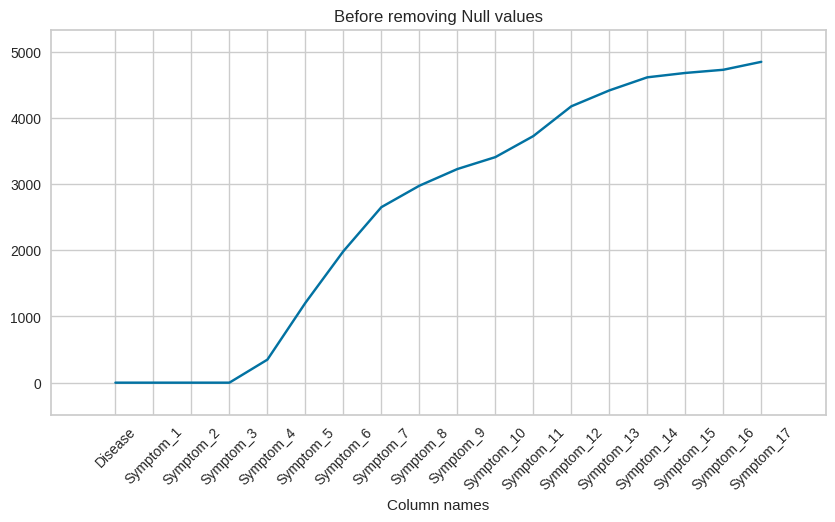

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(nullval.index, nullval['count'])
plt.xticks(nullval.index, nullval.index, rotation=45)
plt.title('Before removing Null values')
plt.xlabel('Column names')
plt.margins(0.1)
plt.grid(True)
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import matplotlib.pyplot as plot

**Remove the trailing space from the symptom columns**

In [ ]:
cols = ds.columns
data = ds[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(ds.shape)

ds = pd.DataFrame(s, columns=ds.columns)
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Malaria,chills,vomiting,high fever,sweating,headache,nausea,diarrhoea,muscle pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AIDS,muscle wasting,patches in throat,high fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chronic cholestasis,itching,vomiting,yellowish skin,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pneumonia,chills,fatigue,cough,high fever,breathlessness,sweating,malaise,phlegm,chest pain,fast heart rate,rusty sputum,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(cols)

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')


System Sevierity Rank

In [ ]:
ds=ds.fillna(0)
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,visual disturbances,0,0,0,0,0,0,0,0
1,Malaria,chills,vomiting,high fever,sweating,headache,nausea,diarrhoea,muscle pain,0,0,0,0,0,0,0,0,0
2,AIDS,muscle wasting,patches in throat,high fever,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chronic cholestasis,itching,vomiting,yellowish skin,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0,0
4,Pneumonia,chills,fatigue,cough,high fever,breathlessness,sweating,malaise,phlegm,chest pain,fast heart rate,rusty sputum,0,0,0,0,0,0


In [ ]:
ss=pd.read_csv("Symptom-severity.csv")
ss['Symptom'] = ss['Symptom'].str.replace('_',' ')
ss.head(10)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
5,chills,3
6,joint pain,3
7,stomach pain,5
8,acidity,3
9,ulcers on tongue,4


In [ ]:
# prompt: Using dataframe ds: CAn you provide me with the symptoms table

symptoms_table = ds.melt(id_vars=['Disease'], var_name='Symptom', value_name='Symptom_value')
symptoms_table


,Disease,Symptom,Symptom_value
0,Migraine,Symptom_1,acidity
1,Malaria,Symptom_1,chills
2,AIDS,Symptom_1,muscle wasting
3,Chronic cholestasis,Symptom_1,itching
4,Pneumonia,Symptom_1,chills
...,...,...,...
83635,Typhoid,Symptom_17,0
83636,Jaundice,Symptom_17,0
83637,Hypertension,Symptom_17,0
83638,Dengue,Symptom_17,0


**Get the overall list of Symptoms**

In [ ]:
ds['Disease'].unique()

array(['Migraine', 'Malaria', 'AIDS', 'Chronic cholestasis', 'Pneumonia',
       'Arthritis', 'Diabetes', 'hepatitis A', 'Cervical spondylosis',
       'Fungal infection', 'Dengue', 'Hepatitis D', 'Alcoholic hepatitis',
       'Urinary tract infection', 'Heart attack', 'Hypothyroidism',
       'Jaundice', 'Acne', 'Drug Reaction', 'Hyperthyroidism', 'GERD',
       'Hepatitis E', 'Varicose veins',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hepatitis B',
       'Dimorphic hemmorhoids(piles)', 'Allergy',
       'Paralysis (brain hemorrhage)', 'Tuberculosis', 'Hypertension',
       'Common Cold', 'Typhoid', 'Gastroenteritis', 'Osteoarthristis',
       'Chicken pox', 'Hypoglycemia', 'Impetigo', 'Bronchial Asthma',
       'Psoriasis', 'Peptic ulcer diseae', 'Hepatitis C'], dtype=object)

In [ ]:
ss['Symptom'].unique() # ss['Symptom'].drop_duplicates()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [ ]:
ss['Symptom'].drop_duplicates()

,Symptom
0,itching
1,skin rash
2,nodal skin eruptions
3,continuous sneezing
4,shivering
...,...
128,inflammatory nails
129,blister
130,red sore around nose
131,yellow crust ooze


**Symptoms** **Ranking**
This is done by comparing ds and ss (two data frames ) and if the syptomps doesn't have a rank in ss it won't assign any rank in ds so the name will appear in the data frame.

In [ ]:
vals = ds.values

symptoms = ss['Symptom'].unique()

# Create a dictionary mapping symptoms to their weights
symptomWeight = dict(zip(ss['Symptom'], ss['weight']))

# Replace symptoms in the DataFrame 'ds' with their corresponding weights
ds.replace(symptomWeight, inplace=True)

# Create a DataFrame 'd' using the modified values and original columns
d = pd.DataFrame(vals, columns=cols)

d.head(50)

<ipython-input-18-093ecf488395>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds.replace(symptomWeight, inplace=True)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0
1,Malaria,3,5,7,3,3,5,6,2,0,0,0,0,0,0,0,0,0
2,AIDS,3,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chronic cholestasis,1,5,3,4,4,4,0,0,0,0,0,0,0,0,0,0,0
4,Pneumonia,3,4,4,7,4,3,6,5,7,5,4,0,0,0,0,0,0
5,Arthritis,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
6,Diabetes,4,3,5,2,5,5,4,4,5,4,0,0,0,0,0,0,0
7,hepatitis A,3,5,3,4,5,4,4,6,5,4,2,0,0,0,0,0,0
8,Cervical spondylosis,3,7,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**The Symptoms with no rank**
There are three symptoms with no rank so replace this using this following code

In [ ]:
ds = d.replace('foul smell of urine',0).replace('dischromic  patches', 0).replace('spotting  urination',0)
ds.head(50)

<ipython-input-19-7b23916bdfb9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds = d.replace('foul smell of urine',0).replace('dischromic  patches', 0).replace('spotting  urination',0)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0
1,Malaria,3,5,7,3,3,5,6,2,0,0,0,0,0,0,0,0,0
2,AIDS,3,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Chronic cholestasis,1,5,3,4,4,4,0,0,0,0,0,0,0,0,0,0,0
4,Pneumonia,3,4,4,7,4,3,6,5,7,5,4,0,0,0,0,0,0
5,Arthritis,2,4,5,5,2,0,0,0,0,0,0,0,0,0,0,0,0
6,Diabetes,4,3,5,2,5,5,4,4,5,4,0,0,0,0,0,0,0
7,hepatitis A,3,5,3,4,5,4,4,6,5,4,2,0,0,0,0,0,0
8,Cervical spondylosis,3,7,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Check whether there is any null values**

In [ ]:
nullval = ds.isnull().sum()
nullval=nullval.to_frame(name="count")
print(nullval)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


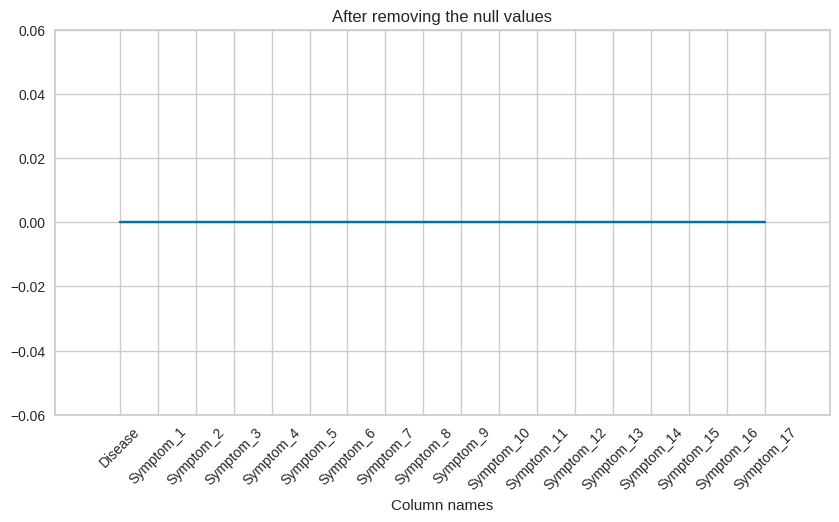

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(nullval.index, nullval['count'])
plt.xticks(rotation=45)
plt.title("After removing the null values")
plt.xlabel("Column names")
plt.margins(0.1)
plt.show()

In [ ]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   int64 
 2   Symptom_2   4920 non-null   int64 
 3   Symptom_3   4920 non-null   int64 
 4   Symptom_4   4920 non-null   int64 
 5   Symptom_5   4920 non-null   int64 
 6   Symptom_6   4920 non-null   int64 
 7   Symptom_7   4920 non-null   int64 
 8   Symptom_8   4920 non-null   int64 
 9   Symptom_9   4920 non-null   int64 
 10  Symptom_10  4920 non-null   int64 
 11  Symptom_11  4920 non-null   int64 
 12  Symptom_12  4920 non-null   int64 
 13  Symptom_13  4920 non-null   int64 
 14  Symptom_14  4920 non-null   int64 
 15  Symptom_15  4920 non-null   int64 
 16  Symptom_16  4920 non-null   int64 
 17  Symptom_17  4920 non-null   int64 
dtypes: int64(17), object(1)
memory usage: 692.0+ KB
None


In [ ]:
print("Number of Symptoms to identify the diseases: ", len(ss['Symptom'].drop_duplicates()))
print("Number of Diseases: ", len(ds['Disease'].drop_duplicates()))

Number of Symptoms to identify the diseases:  132
Number of Diseases:  41


**Now train and test**

In [ ]:
ds.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.147561,4.043902,3.828049,3.114634,2.640244,2.028049,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,1.316310,1.232387,1.390184,1.921436,2.169638,2.369987,2.299851,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


In [ ]:
data= ds.iloc[:,1:].values
labels=ds['Disease'].values

#**Designing the training set and testing set(test=20% and training set=80%)**

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, train_size=0.8, random_state=27)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3936, 17) (984, 17) (3936,) (984,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Define range of values for max_depth to be evaluated
max_depth_values = range(1, 21)

# Initialize an empty list to store cross-validation scores for each max_depth value
cvScores = []

# Iterate over each max_depth value
for max_depth in max_depth_values:
    # Initialize DecisionTreeClassifier with current max_depth value
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=27)

    # Perform cross-validation with 5 folds and calculate mean accuracy
    scores = cross_val_score(tree, train_x, train_y, cv=5)
    meanAccuracy = np.mean(scores)

    # Append mean accuracy to the list of cross-validation scores
    cvScores.append(meanAccuracy)

# Find the index of the max cross-validation score
bestIndex = np.argmax(cvScores)

# Get the optimal max_depth value corresponding to the best index
optimalMaxDepth = max_depth_values[bestIndex]

print("Optimal max_depth:", optimalMaxDepth)


Optimal max_depth: 19


In [ ]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 19, 20]
}

# Initialize Random Forest classifier
rf_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 19}
Best Score: 0.9944117286618205


The Optimal max_depth is 19 by not using the manual method instead we used is obtained.
Now we useModels to predict and give the output them in a graph format

**DECISION TREE**

In [ ]:
import time
from sklearn.metrics import r2_score

tree =DecisionTreeClassifier(random_state=27,max_depth=19)
start_time=time.time()
tree.fit(train_x, train_y)
print(time.time()-start_time)
prediction=tree.predict(test_x)
classificationReport=classification_report(test_y, prediction, output_dict=True)
ds_report = pd.DataFrame(classificationReport).transpose()
print(ds_report)
print('\nF1-score =', f1_score(test_y, prediction, average='macro'))
print('Accuracy% =', accuracy_score(test_y, prediction)*100)

0.03153038024902344
                                         precision    recall  f1-score  \
(vertigo) Paroymsal  Positional Vertigo   1.000000  1.000000  1.000000   
AIDS                                      1.000000  1.000000  1.000000   
Acne                                      1.000000  1.000000  1.000000   
Alcoholic hepatitis                       1.000000  1.000000  1.000000   
Allergy                                   1.000000  1.000000  1.000000   
Arthritis                                 1.000000  1.000000  1.000000   
Bronchial Asthma                          1.000000  1.000000  1.000000   
Cervical spondylosis                      0.916667  1.000000  0.956522   
Chicken pox                               1.000000  1.000000  1.000000   
Chronic cholestasis                       1.000000  1.000000  1.000000   
Common Cold                               1.000000  1.000000  1.000000   
Dengue                                    1.000000  1.000000  1.000000   
Diabetes          

F1-score = 0.9979232944503358
Accuracy% = 99.79674796747967


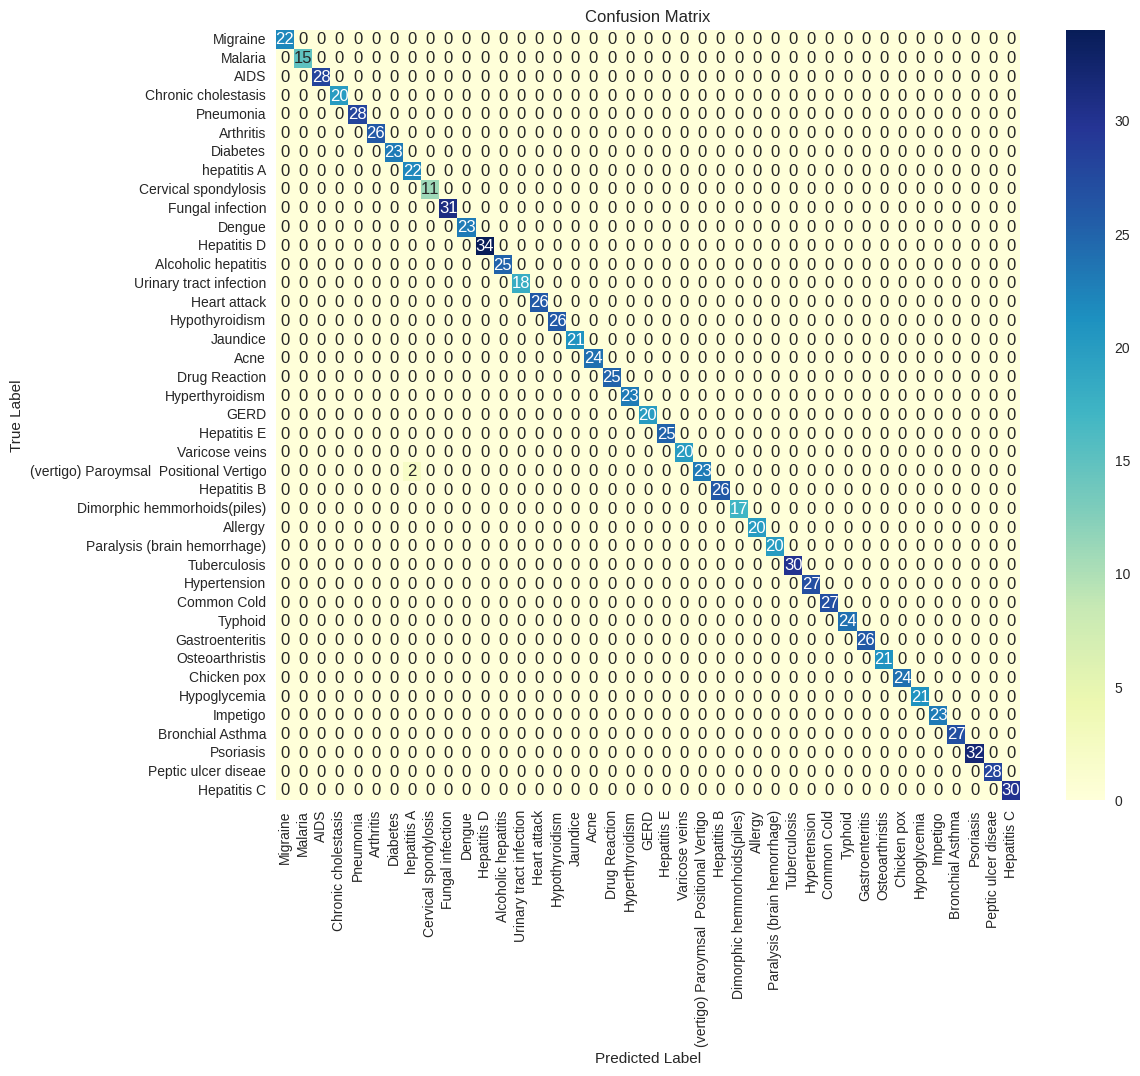

In [ ]:
#Plot the confusson matrix
print('F1-score =', f1_score(test_y, prediction, average='macro'))
print('Accuracy% =', accuracy_score(test_y, prediction)*100)
confusionMatrix = confusion_matrix(test_y, prediction)
ds_ConfusionReport = pd.DataFrame(confusionMatrix, index=ds['Disease'].drop_duplicates(), columns=ds['Disease'].drop_duplicates())
plt.figure(figsize=(12, 10))
sns.heatmap(ds_ConfusionReport, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=27)
DS_train =cross_val_score(tree, train_x, train_y, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%% " %(DS_train.mean()*100.0))
print("Standard Deviation: %.3f%%" %(DS_train.std()*100.0))

Mean Accuracy: 99.416% 
Standard Deviation: 0.534%


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_Test =cross_val_score(tree, test_x, test_y, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_Test,columns=['Scores'])
print("Mean Accuracy: %.3f%% " %(DS_Test.mean()*100.0))
print("Standard Deviation: %.3f%%" %(DS_Test.std()*100.0))

Mean Accuracy: 98.882% 
Standard Deviation: 0.846%


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 19, 20]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=27)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 15}
Best Score: 0.9926328214191269


In [ ]:
# prompt: Train a model using random forest
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
start_time= time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=27)

# Train the model on the training data
rf.fit(train_x, train_y)
print(time.time()- start_time)
# Make predictions on the test data
rf_predictions = rf.predict(test_x)

# Evaluate the model's performance
rf_accuracy = accuracy_score(test_y, rf_predictions)*100
rf_f1_score = f1_score(test_y, rf_predictions, average='macro')
print(test_x[0])
print(rf_predictions[0])
# Print the results
print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest F1-Score:', rf_f1_score)

#Obtain the classification report
classificationReport=classification_report(test_y, rf_predictions, output_dict=True)
ds_report = pd.DataFrame(classificationReport).transpose()
print(ds_report)

0.35079288482666016
[4 3 2 5 5 4 4 5 4 0 0 0 0 0 0 0 0]
Diabetes
Random Forest Accuracy: 99.79674796747967
Random Forest F1-Score: 0.9979232944503358
                                         precision    recall  f1-score  \
(vertigo) Paroymsal  Positional Vertigo   1.000000  1.000000  1.000000   
AIDS                                      1.000000  1.000000  1.000000   
Acne                                      1.000000  1.000000  1.000000   
Alcoholic hepatitis                       1.000000  1.000000  1.000000   
Allergy                                   1.000000  1.000000  1.000000   
Arthritis                                 1.000000  1.000000  1.000000   
Bronchial Asthma                          1.000000  1.000000  1.000000   
Cervical spondylosis                      0.916667  1.000000  0.956522   
Chicken pox                               1.000000  1.000000  1.000000   
Chronic cholestasis                       1.000000  1.000000  1.000000   
Common Cold                         

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
start_time= time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=27)

# Train the model on the training data
rf.fit(train_x, train_y)
print(time.time()- start_time)

0.48420047760009766


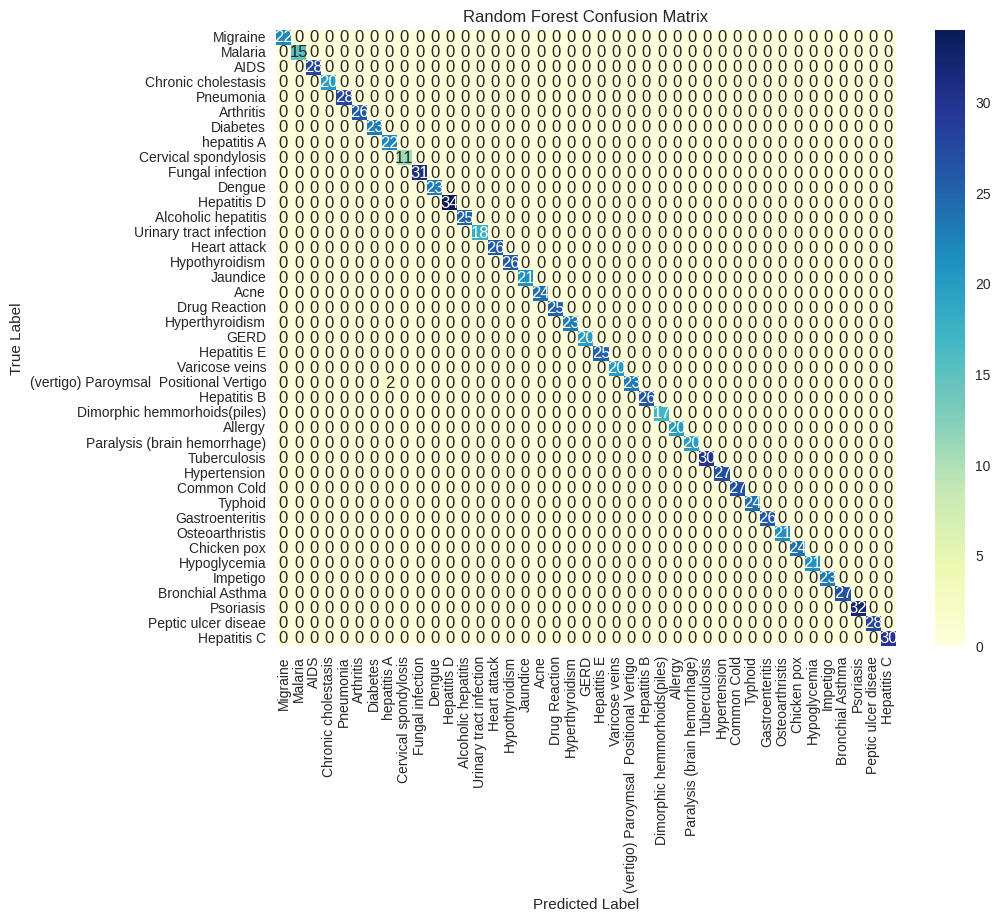

In [ ]:
# Create a confusion matrix
rf_cm = pd.DataFrame(confusionMatrix, index=ds['Disease'].drop_duplicates(), columns=ds['Disease'].drop_duplicates())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**For Training set**

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=27)# Changing the splits can improve the accuracy of the mean smaller the better and its based on the problem we are dealing with
randomForestTrain =cross_val_score(rf, train_x, train_y, cv=kfold, scoring="accuracy")
pd.DataFrame(randomForestTrain,columns=["Scores"])
print("Mean Accuracy: %.3f%% "% (randomForestTrain.mean()*100.0))
print("Standard Deviation: %.3f%%" % (randomForestTrain.std()*100.0))

Mean Accuracy: 99.340% 
Standard Deviation: 0.485%


**For Test Set**

In [ ]:
kfold=KFold(n_splits=10, shuffle=True, random_state=27)
randomForestTest=cross_val_score(rf, test_x, test_y, cv=kfold, scoring="accuracy")
pd.DataFrame(randomForestTest, columns=["Scores"])
print("Mean Accuracy: %.3f%%" %(randomForestTest.mean()*100.0))
print("Standard Deviation: %.3f%%" %(randomForestTest.std()*100.0))

Mean Accuracy: 99.391%
Standard Deviation: 0.672%


**MLP**

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score

# Create an MLPClassifier object
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', random_state=27)

# Train the model on the training data
mlp.fit(train_x, train_y)
print("Training time:", time.time() - start_time)
mlp_predictions = mlp.predict(test_x)


Training time: 24.691328048706055


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
classificationReport=classification_report(test_y, mlp_predictions, output_dict=True)
ds_report = pd.DataFrame(classificationReport).transpose()
print(ds_report)

                                         precision  recall  f1-score  support
(vertigo) Paroymsal  Positional Vertigo        1.0     1.0       1.0     22.0
AIDS                                           1.0     1.0       1.0     15.0
Acne                                           1.0     1.0       1.0     28.0
Alcoholic hepatitis                            1.0     1.0       1.0     20.0
Allergy                                        1.0     1.0       1.0     28.0
Arthritis                                      1.0     1.0       1.0     26.0
Bronchial Asthma                               1.0     1.0       1.0     23.0
Cervical spondylosis                           1.0     1.0       1.0     22.0
Chicken pox                                    1.0     1.0       1.0     11.0
Chronic cholestasis                            1.0     1.0       1.0     31.0
Common Cold                                    1.0     1.0       1.0     23.0
Dengue                                         1.0     1.0      

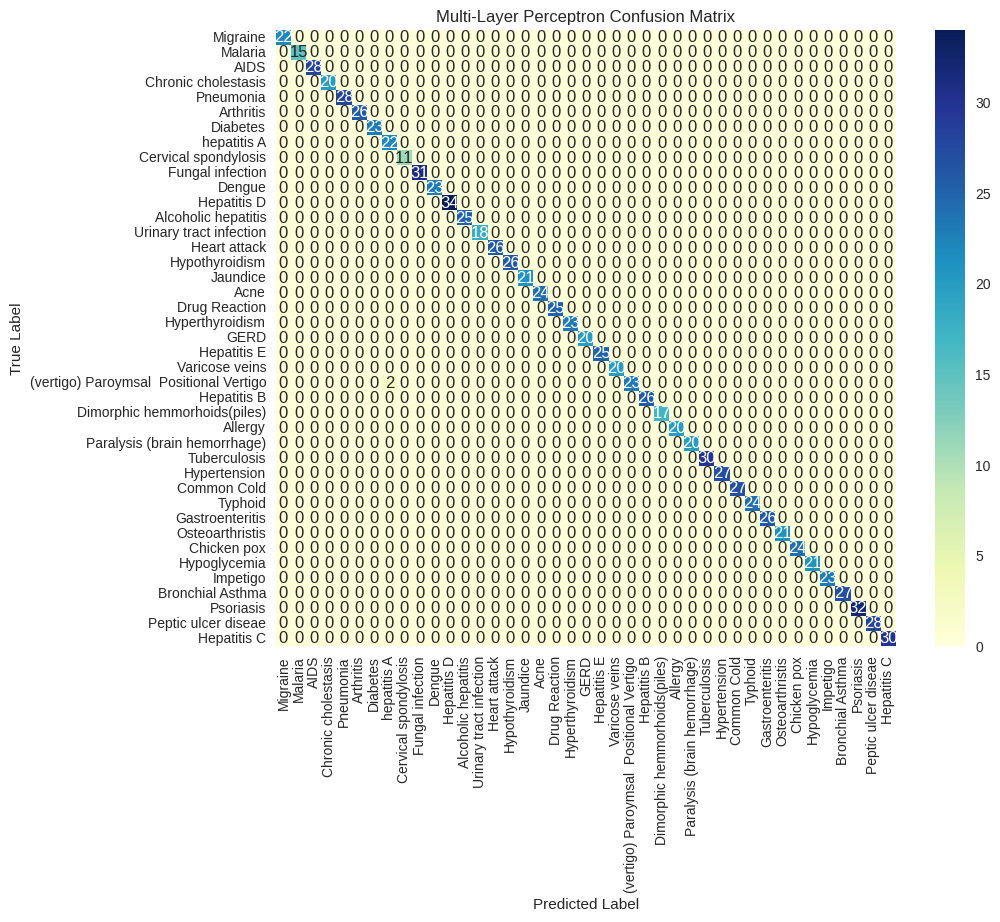

In [ ]:
# Create a confusion matrix
mlp_cm = pd.DataFrame(confusionMatrix, index=ds['Disease'].drop_duplicates(), columns=ds['Disease'].drop_duplicates())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Multi-Layer Perceptron Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=27)
mlp_train_scores = cross_val_score(mlp, train_x, train_y, cv=kfold, scoring="accuracy")
pd.DataFrame(mlp_train_scores, columns=["Scores"])
# Print mean accuracy and standard deviation
print("Mean Accuracy: %.3f%%" % (mlp_train_scores.mean() * 100.0))
print("Standard Deviation: %.3f%%" % (mlp_train_scores.std() * 100.0))


Mean Accuracy: 99.238%
Standard Deviation: 0.521%


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=27)
mlp_test_scores = cross_val_score(mlp, test_x, test_y, cv=kfold, scoring="accuracy")
pd.DataFrame(mlp_test_scores, columns=["Scores"])
# Print mean accuracy and standard deviation
print("Mean Accuracy: %.3f%%" % (mlp_test_scores.mean() * 100.0))
print("Standard Deviation: %.3f%%" % (mlp_test_scores.std() * 100.0))


Mean Accuracy: 97.663%
Standard Deviation: 1.368%


KNN

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
test_x = imputer.fit_transform(test_x)


In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
start_time= time.time()
KNN = KNeighborsClassifier().fit(train_x, train_y)
print(time.time()- start_time)

0.01808905601501465


In [ ]:
y_pred = KNN.predict(test_x)
print(classification_report(test_y,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        15
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       0.83      1.00      0.91        20
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       0.92      1.00      0.96        22
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        23
                           

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=27)# Changing the splits can improve the accuracy of the mean smaller the better and its based on the problem we are dealing with
KnnTrain =cross_val_score(KNN, train_x, train_y, cv=kfold, scoring="accuracy")
pd.DataFrame(KnnTrain,columns=["Scores"])
print("Mean Accuracy: %.3f%% "% (KnnTrain.mean()*100.0))
print("Standard Deviation: %.3f%%" % (KnnTrain.std()*100.0))

Mean Accuracy: 98.831% 
Standard Deviation: 0.593%


In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=27)# Changing the splits can improve the accuracy of the mean smaller the better and its based on the problem we are dealing with
KnnTest =cross_val_score(KNN, test_x, test_y, cv=kfold, scoring="accuracy")
pd.DataFrame(KnnTest,columns=["Scores"])
print("Mean Accuracy: %.3f%% "% (KnnTest.mean()*100.0))
print("Standard Deviation: %.3f%%" % (KnnTest.std()*100.0))

Mean Accuracy: 95.326% 
Standard Deviation: 1.940%


In [ ]:
!pip install "dask[distributed]" --upgrade

#Using Dask and Joblib

In [ ]:
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=10, memory_limit='3GB')
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/17691/1
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/17691/4
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:44263
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/17691/1
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          4
INFO:distributed.worker:               Memory:                   2.79 GiB
INFO:d

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.28.0.12:8787/status,
Dashboard: http://172.28.0.12:8787/status,Workers: 10
Total threads: 40,Total memory: 27.94 GiB
Status: running,Using processes: False
Comm: inproc://172.28.0.12/17691/1,Workers: 10
Dashboard: http://172.28.0.12:8787/status,Total threads: 40
Started: Just now,Total memory: 27.94 GiB
Comm: inproc://172.28.0.12/17691/4,Total threads: 4
Dashboard: http://172.28.0.12:44263/status,Memory: 2.79 GiB
Nanny: None,


**Random Forest using Dask**

In [ ]:
import time
import joblib
import dask
start_time= time.time()
with joblib.parallel_backend('dask'):
  rf = RandomForestClassifier(n_estimators=100, random_state=27).fit(train_x, train_y)
print(time.time()- start_time)

1.6661334037780762


In [ ]:
y_pred = rf.predict(test_x)
print(classification_report(test_y,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        15
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       0.92      1.00      0.96        22
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        23
                           

**MLP**

In [ ]:
import time
import joblib
import dask
start_time= time.time()
with joblib.parallel_backend('dask'):
  mlp = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', solver='adam', random_state=27).fit(train_x, train_y)
print(time.time()- start_time)

58.991530895233154


In [ ]:
y_pred = mlp.predict(test_x)
print(classification_report(test_y,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        15
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       1.00      1.00      1.00        22
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        23
                           

**Decision Tree using dask**

In [ ]:
import time
import joblib
import dask
start_time= time.time()
with joblib.parallel_backend('dask'):
  t=tree.fit(train_x, train_y)
print(time.time()- start_time)

0.021912813186645508


In [ ]:
y_pred = t.predict(test_x)
print(classification_report(test_y,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        15
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       1.00      1.00      1.00        20
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       0.92      1.00      0.96        22
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        23
                           

**KNN using dask**

In [ ]:
import time
start_time= time.time()
import joblib
import dask
with joblib.parallel_backend('dask'):
    Knn = KNeighborsClassifier().fit(train_x, train_y)
print(time.time()- start_time)

0.0063018798828125


In [ ]:
y_preds = Knn.predict(test_x)
print(classification_report(test_y,y_preds))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        15
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       0.83      1.00      0.91        20
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        26
                       Bronchial Asthma       1.00      1.00      1.00        23
                   Cervical spondylosis       0.92      1.00      0.96        22
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        23
                           

#Manually testing and creating the prediction result

In [ ]:
description = pd.read_csv("symptom_Description.csv")

In [ ]:
description.head(10)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...
5,GERD,"Gastroesophageal reflux disease, or GERD, is a..."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurrin..."
7,hepatitis A,Hepatitis A is a highly contagious liver infec...
8,Osteoarthristis,Osteoarthritis is the most common form of arth...
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is...


In [ ]:
extra=pd.read_csv("symptom_precaution.csv")

In [ ]:
extra.head(10)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [ ]:
doctors=pd.read_csv("symptom_doctors.csv")

In [ ]:
doctors.head(10)

,Disease,Clinic,Doctor
0,Drug Reaction,SivaShree Skin Care,Dr.Siva Shree
1,Malaria,Baskar Clinic,Dr.Ashok Baskar
2,Allergy,SivaShree Skin Care,Dr.Siva Shree
3,Hypothyroidism,Behera Clinic,Dr. Behera
4,Psoriasis,SivaShree Skin Care,Dr.Siva Shree
5,GERD,"M.V. Super Speciality Clinic - Gastro , Liver ...",\nDr. S. Arulprakash
6,Chronic cholestasis,"M.V. Super Speciality Clinic - Gastro , Liver ...",\nDr. S. Arulprakash
7,hepatitis A,RajaMuthaiah College of medicine,Prof.Dr.A.G.Arivukkarasu
8,Osteoarthristis,Sona Hospital,Dr. Senthilnathan
9,(vertigo) Paroymsal Positional Vertigo,Manavalan Clinic,Dr S Manavalan


In [ ]:
model_name = "random_forest_model.joblib"  # Example model name
directory_path = "Save"  # Example directory path

# Save the model to the specified directory
joblib.dump(rf, directory_path + model_name)


['Saverandom_forest_model.joblib']

In [ ]:
load_model=joblib.load("Saverandom_forest_model.joblib")
print(load_model)

RandomForestClassifier(random_state=27)


In [ ]:
def predd(x, *symptoms):
    # Convert symptoms to weights
    weights = ss.set_index('Symptom')['weight'].to_dict()
    symptom_weights = [weights.get(symptom, 0) for symptom in symptoms]

    # Predict disease
    pred = x.predict([symptom_weights])[0]

    # Display disease information
    disease_info = description[description['Disease'] == pred]
    disease_description = disease_info.iloc[0]['Description']
    precautions = extra[extra['Disease'] == pred].iloc[0, 1:].tolist()

    #Display doctors name and clinic details
    doc_info=description[description['Disease'] == pred]
    doc_det=doc_info.iloc[0]['Description']
    docs=doctors[doctors['Disease'] == pred].iloc[0, 1:].tolist()

    print("The Disease Name:", pred)
    print("The Disease Description:", disease_description)
    print("Recommended Things to do at home:")

    for precaution in precautions:
        print(precaution)
    print("Clinics and the Doctors: ")
    for doct in docs:
      print(doct)

# Comparison between algorithms

**Training Accuracy**

In [ ]:
noOfGroups = 3
algorithms = ("Multi-Layer Perceptron", "Random Forest", "KNN")
trainingAccuracy = (mlp_train_scores.mean()*100.0, randomForestTrain.mean()*100.0, KnnTrain.mean()*100.0)
print(trainingAccuracy)

(99.23793286059338, 99.33952028519396, 98.83100192454245)


**Test Accuracy**

In [ ]:
testAccuracy = (mlp_test_scores.mean()*100.0, randomForestTest.mean()*100.0, KnnTest.mean()*100.0)
print(testAccuracy)

(97.66336837765411, 99.3908472479901, 95.32570603999176)


**Standard Deviation**

In [ ]:
standardDeviation = (mlp_test_scores.std()*100.0, randomForestTest.std()*100.0, KnnTest.std()*100.0)
print(standardDeviation)

(1.3675230798323394, 0.6719038591345157, 1.9396312369988098)


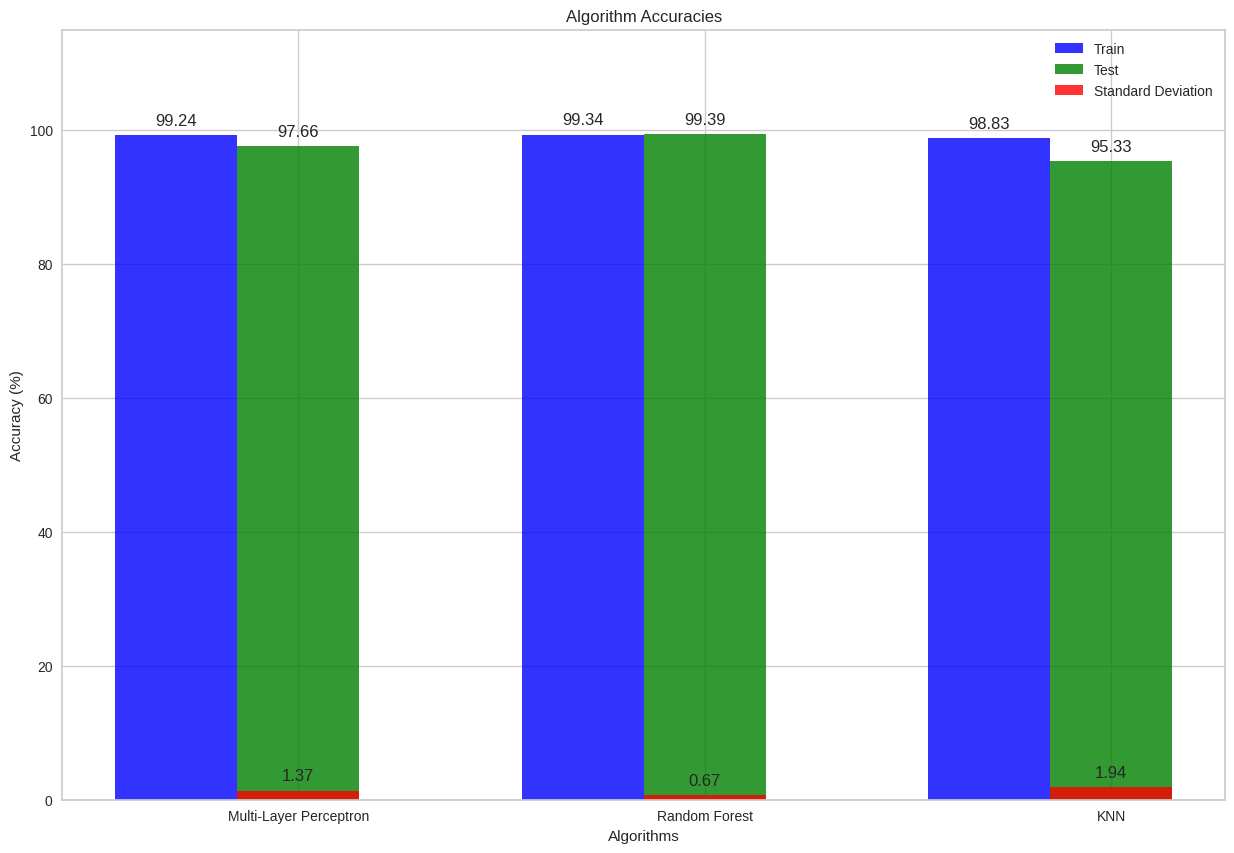

In [ ]:
# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(noOfGroups)
bar_width = 0.3
opacity = 0.8

# Plot bars for training accuracy
rects1 = plt.bar(index, trainingAccuracy, bar_width, alpha=opacity, color='blue', label='Train')

# Plot bars for test accuracy
rects2 = plt.bar(index + bar_width, testAccuracy, bar_width, alpha=opacity, color='green', label='Test')

# Plot bars for standard deviation
rects3 = plt.bar(index + bar_width, standardDeviation, bar_width, alpha=opacity, color='red', label='Standard Deviation')

plt.xlabel('Algorithms')  # x axis label
plt.ylabel('Accuracy (%)')  # y axis label
plt.ylim(0, 115)
plt.title('Algorithm Accuracies')  # plot title
plt.xticks(index + bar_width, algorithms)  # x axis data labels
plt.legend(loc='upper right')  # show legend

for rect1, rect2, rect3, train_acc, test_acc, std_dev in zip(rects1, rects2, rects3, trainingAccuracy, testAccuracy, standardDeviation):
    ax.text(rect1.get_x() + rect1.get_width() / 2, rect1.get_height() + 1, f'{round(train_acc, 2)}', ha='center', va='bottom')
    ax.text(rect2.get_x() + rect2.get_width() / 2, rect2.get_height() + 1, f'{round(test_acc, 2)}', ha='center', va='bottom')
    ax.text(rect3.get_x() + rect3.get_width() / 2, rect3.get_height() + 1, f'{round(std_dev, 2)}', ha='center', va='bottom')

plt.show()


#Print out the prediction for the user

In [ ]:
sympList=ss["Symptom"].to_list()
predd(rf, sympList[0],sympList[60],sympList[5],sympList[70],sympList[100],sympList[6],0,0,0,0,0,0,0,0,0,0,0)

The Disease Name: Chronic cholestasis
The Disease Description: Chronic cholestatic diseases, whether occurring in infancy, childhood or adulthood, are characterized by defective bile acid transport from the liver to the intestine, which is caused by primary damage to the biliary epithelium in most cases
Recommended Things to do at home:
cold baths
anti itch medicine
consult doctor
eat healthy
Clinics and the Doctors: 
M.V. Super Speciality Clinic - Gastro , Liver & Pancreas Clinic

Dr. S. Arulprakash
